<a href="https://colab.research.google.com/github/vidhan-tiwari/Fake_instagram_account_detection/blob/main/fake_insta_ANN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from huggingface_hub import login
login()

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import seaborn as sns
%matplotlib inline

In [ ]:
from datasets import load_dataset
import pandas as pd
dataset = load_dataset("nahiar/instagram_bot_detection")

In [5]:
df = dataset['train'].to_pandas()
df.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [6]:
df = df.sample(frac = 1, random_state = 42).reset_index(drop = True)
X = df.drop("fake",axis = 1)
y = df["fake"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state = 42, test_size = 0.2)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [9]:
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()
# layer 1
model.add(Dense(32,input_shape = (X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
# layer 2
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
# output layer
model.add(Dense(1,activation = 'sigmoid'))
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
model.summary()

# Define the EarlyStopping callback
callback = EarlyStopping(
    monitor='val_loss',
    patience=12,
    restore_best_weights=True
)

# Train

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[callback],
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8196 - loss: 0.4356 - val_accuracy: 0.9410 - val_loss: 0.2131
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9359 - loss: 0.1905 - val_accuracy: 0.9480 - val_loss: 0.1431
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9337 - loss: 0.1812 - val_accuracy: 0.9520 - val_loss: 0.1276
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9381 - loss: 0.1900 - val_accuracy: 0.9540 - val_loss: 0.1232
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9397 - loss: 0.1722 - val_accuracy: 0.9590 - val_loss: 0.1176
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9373 - loss: 0.1640 - val_accuracy: 0.9610 - val_loss: 0.1160
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9413 - loss: 0.1538 - val_accuracy: 0.9600 - val_loss: 0.1128
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9345 - loss: 0.1754 - val_accuracy: 0

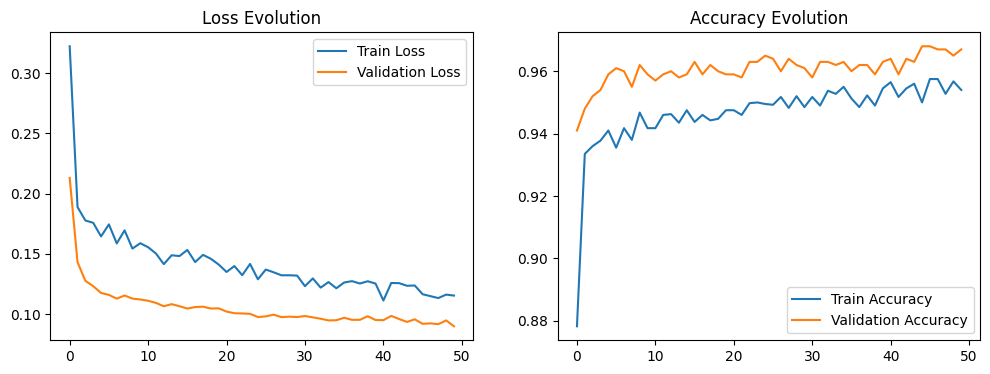

In [10]:
# plot Loss
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Evolution')
plt.legend()

# plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Evolution')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import classification_report

y_pred_proba = model.predict(X_test)
y_pred_binary = (y_pred_proba > 0.5).astype(int)

print(classification_report(y_test, y_pred_binary))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       482
           1       0.99      0.94      0.97       518

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



In [ ]:
model.save('instagram_fake_detector.h5')

import joblib
joblib.dump(scaler, 'scaler.pkl')

In [13]:
all_records = {
    "Person 1": np.array([1, 0.25,  7, 0, 0, 19, 0, 1, 0, 277, 220]), # person_1
    "Person 2": np.array([1, 0.17, 22, 0, 0, 37, 0, 1, 7, 343, 308]), # person_2
    "Person 3": np.array([1, 0.16, 13, 0, 0, 0,  0, 1, 0, 302, 736]), # person_3
    "Person 4": np.array([1, 0.11, 17, 0, 0, 0,  0, 1, 0, 127, 247]), # person_4
    "Random 1": np.array([0, 0.05,  6, 0.15, 0, 32, 1, 0, 126, 6000, 7500]) # Suspicious
}

names = list(all_records.keys())
custom_data = np.array(list(all_records.values()))

# data scaling using standard scaler
custom_data_scaled = scaler.transform(custom_data)

# Data prediction
predictions = model.predict(custom_data_scaled)


print("-" * 50)
print(f"{'Name':<15} | {'Probability (Fake)':<20} | {'Result'}")
print("-" * 50)

for i, name in enumerate(names):
    prob_fake = predictions[i][0]

    result = "FAKE ACCOUNT" if prob_fake > 0.5 else "Real Account"

    print(f"{name:<15} | {prob_fake:.8f}           | {result}")

print("-" * 50)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
--------------------------------------------------
Name            | Probability (Fake)   | Result
--------------------------------------------------
Person 1        | 0.02222522           | Real Account
Person 2        | 0.00003019           | Real Account
Person 3        | 0.00512698           | Real Account
Person 4        | 0.00332271           | Real Account
Random 1        | 0.03444486           | Real Account
--------------------------------------------------
